<a href="https://colab.research.google.com/github/Shravani-std/Deep-Learning/blob/main/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
cats = '/kaggle/input/cat-and-dog/training_set/training_set/cats'
dogs = '/kaggle/input/cat-and-dog/training_set/training_set/dogs'

In [11]:
# Generators = Used to process large amount of data into batches
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256),

    )
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256),

    )


Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
# Normalize : Transformation ( pizel values should be in range 1-0 )
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 107ms/step - accuracy: 0.5571 - loss: 6.9534 - val_accuracy: 0.5363 - val_loss: 1.3734
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.5702 - loss: 0.8347 - val_accuracy: 0.5937 - val_loss: 0.6952
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6505 - loss: 0.6746 - val_accuracy: 0.6199 - val_loss: 0.7461
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.7011 - loss: 0.5811 - val_accuracy: 0.6896 - val_loss: 0.6031
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.7198 - loss: 0.5356 - val_accuracy: 0.6772 - val_loss: 0.5803
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7656 - loss: 0.4801 - val_accuracy: 0.6960 - val_loss: 0.6767
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.7940 - loss: 0.4443 - val_accuracy: 0.7301 - val_loss: 0.6465
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.8217 - loss: 0.3854 

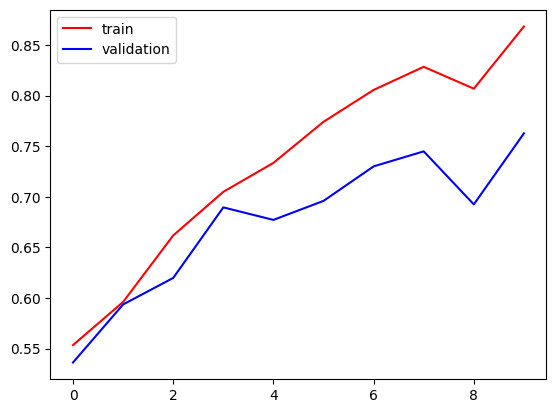

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red', label = 'train')

plt.plot(history.history['val_accuracy'], color= 'blue', label = 'validation')
plt.legend()
plt.show()

# Reduce Overfitting
1. Add More data
2. Data Augmentation
3. L1/L2 regularization
4. Dropout
5. Batch Normalization
6. Reduce complexity

In [19]:
import cv2

In [26]:
test_image = cv2.imread('/content/cat_2.jpg')

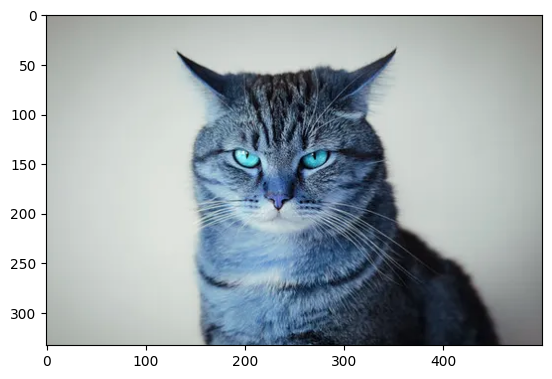

In [27]:
plt.imshow(test_image)

In [28]:
test_image.shape

(333, 500, 3)

In [29]:
test_image = cv2.resize(test_image, (256,256))

In [30]:
test_inout = test_image.reshape((1,256,256,3))

In [31]:
model.predict(test_inout)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)